In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeGenSingA(3, 2, delta = .00000)
A

array([[[ 0.        ,  0.10990779,  0.22342554],
        [ 0.16856968,  0.        ,  0.16476365],
        [ 0.12930905,  0.20402428,  0.        ]],

       [[-1.        ,  0.06698616,  0.26634717],
        [ 0.01204791, -1.        ,  0.32128542],
        [ 0.24983611,  0.08349722, -1.        ]],

       [[ 0.        ,  0.28611644,  0.04721689],
        [ 0.03729466,  0.        ,  0.29603868],
        [ 0.09556282,  0.23777051,  0.        ]]])

[[0.20316949 0.36325581 0.43357464]
 [0.37162436 0.25737775 0.37099784]
 [0.308653   0.43672436 0.25462257]]


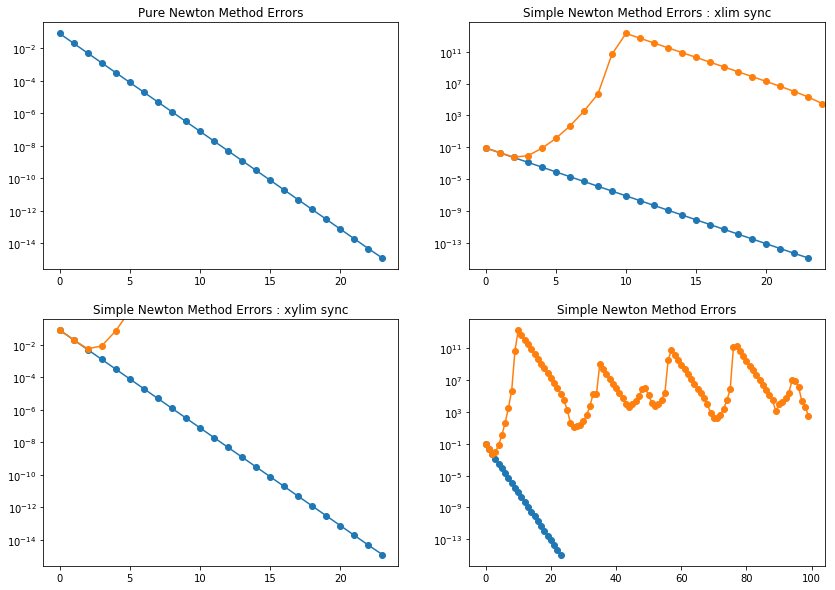

In [3]:
Ss = shf.NewtonPoly(A)
ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

ax2.semilogy(Ss['errs'],'-o')
ax2.semilogy(ss['errs'],'-o')
ax2.set_xlim(ax1.get_xlim())
ax2.set_title('Simple Newton Method Errors : xlim sync')

ax3.semilogy(Ss['errs'],'-o')
ax3.semilogy(ss['errs'],'-o')
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())
ax3.set_title('Simple Newton Method Errors : xylim sync')

ax4.semilogy(Ss['errs'],'-o')
ax4.semilogy(ss['errs'],'-o')
ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

# for i in range(len(Ds)):
#     print(Ds[i])
#     print(EVs[i])

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])
# coeffi.transpose()

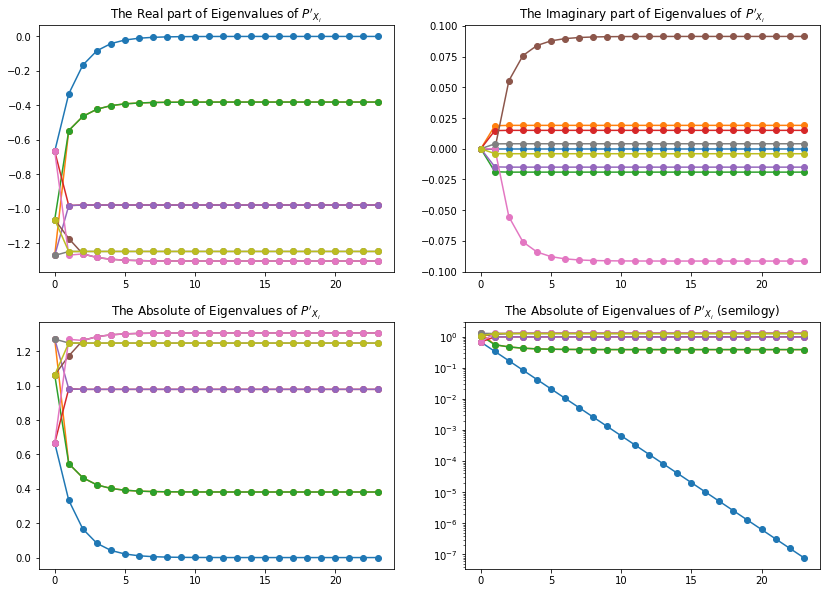

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    ax1.plot(np.real(dss[i,:]),'-o')
    ax2.plot(np.imag(dss[i,:]),'-o')
    ax3.plot(np.abs(dss[i,:]),'-o')
    ax4.semilogy(np.abs(dss[i,:]),'-o')

In [7]:
coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

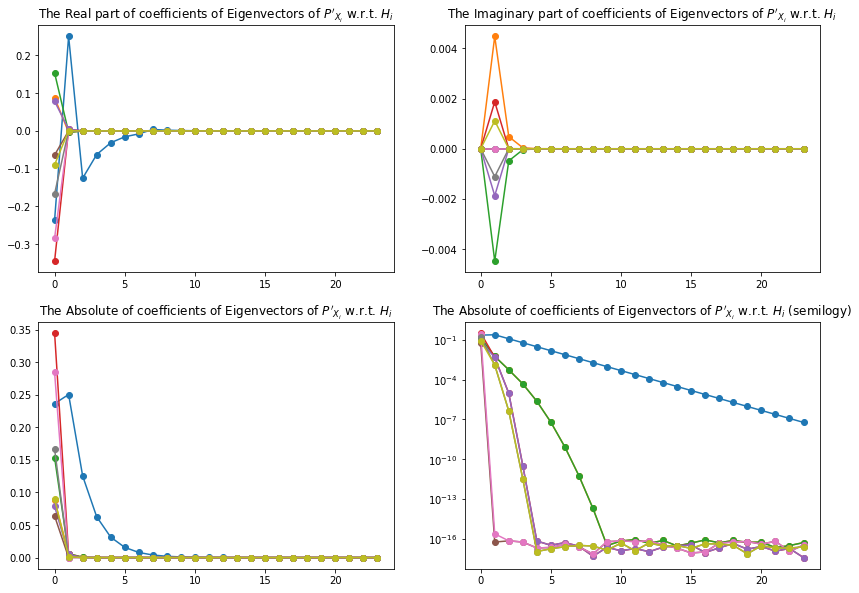

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$ (semilogy)")

for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')